In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value


In [2]:
def lbp_calculated_pixel(img, x, y):
    '''
    Format : 
    64 | 128 | 1
    ----------------
    32 | 0 | 2
    ----------------
    16 | 8 | 4 
    '''
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))  # top_right
    val_ar.append(get_pixel(img, center, x, y+1))  # right
    val_ar.append(get_pixel(img, center, x+1, y+1))  # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))  # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))  # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))  # left
    val_ar.append(get_pixel(img, center, x-1, y-1))  # top_left
    val_ar.append(get_pixel(img, center, x-1, y))  # top

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val


In [3]:
def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(20, 6))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap=plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color="black")
            current_plot.set_xlim([0, 260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list, rotation=90)
        elif current_type == "normal":
            current_plot.imshow(current_img)
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
    plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_9212\602346979.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list, rotation=90)


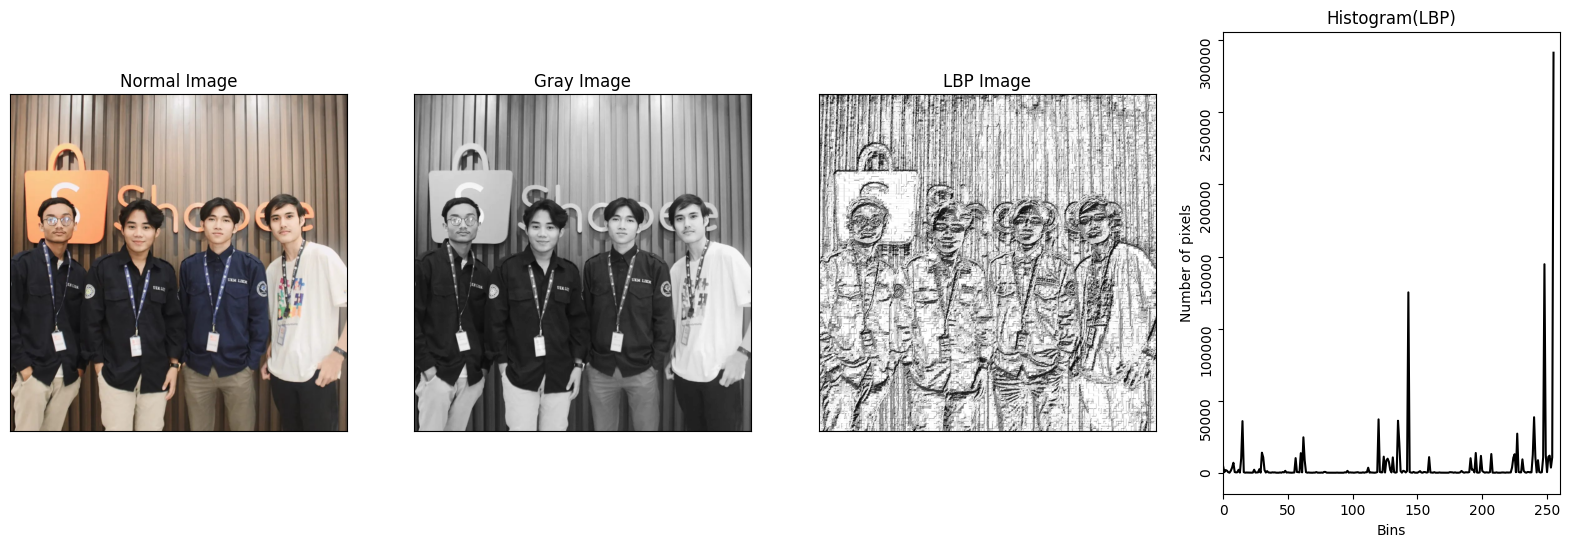

LBP Program selesai


In [4]:
image_file = 'shopee1.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((height, width, 3), np.uint8)

for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])

output_list = []
output_list.append({
    "img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Normal Image",
    "type": "normal"
})
output_list.append({
    "img": img_gray,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Gray Image",
    "type": "gray"
})
output_list.append({
    "img": img_lbp,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "LBP Image",
    "type": "gray"
})
output_list.append({
    "img": hist_lbp,
    "xlabel": "Bins",
    "ylabel": "Number of pixels",
    "xtick": None,
    "ytick": None,
    "title": "Histogram(LBP)",
    "type": "histogram"
})

show_output(output_list)

cv2.waitKey(0)
cv2.destroyAllWindows()

print("LBP Program selesai")

LBP Program selesai


C:\Users\Asus\AppData\Local\Temp\ipykernel_9212\602346979.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list, rotation=90)


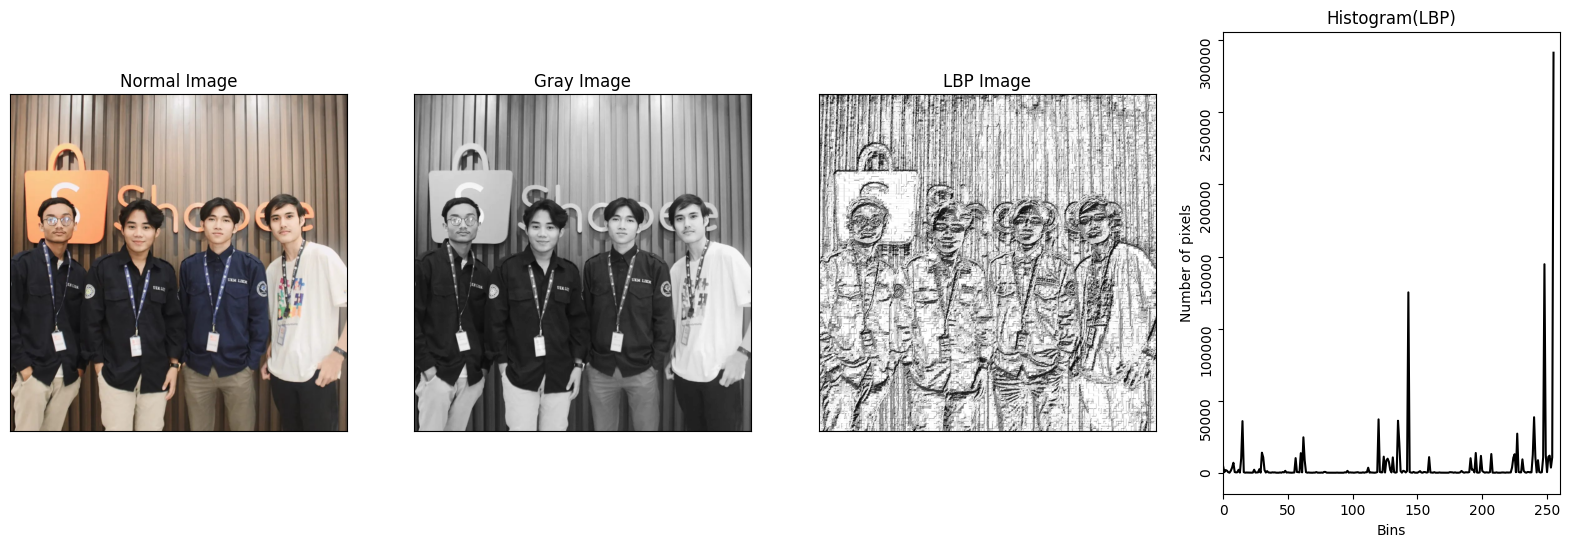

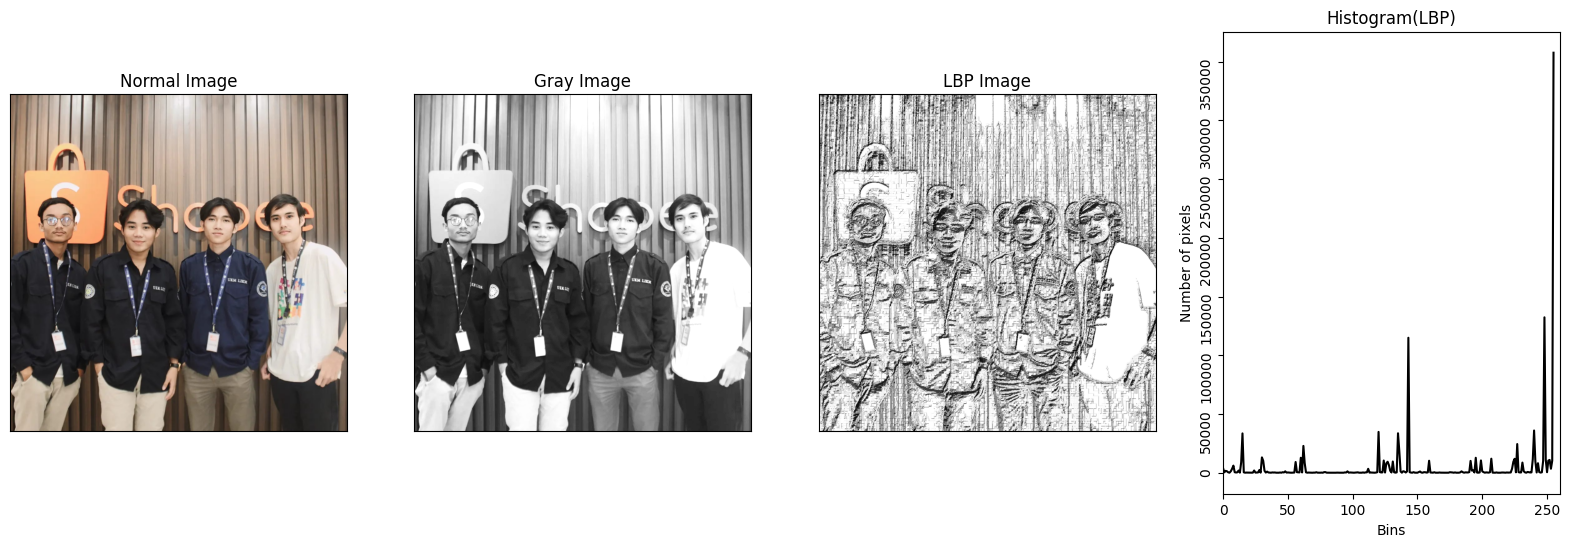

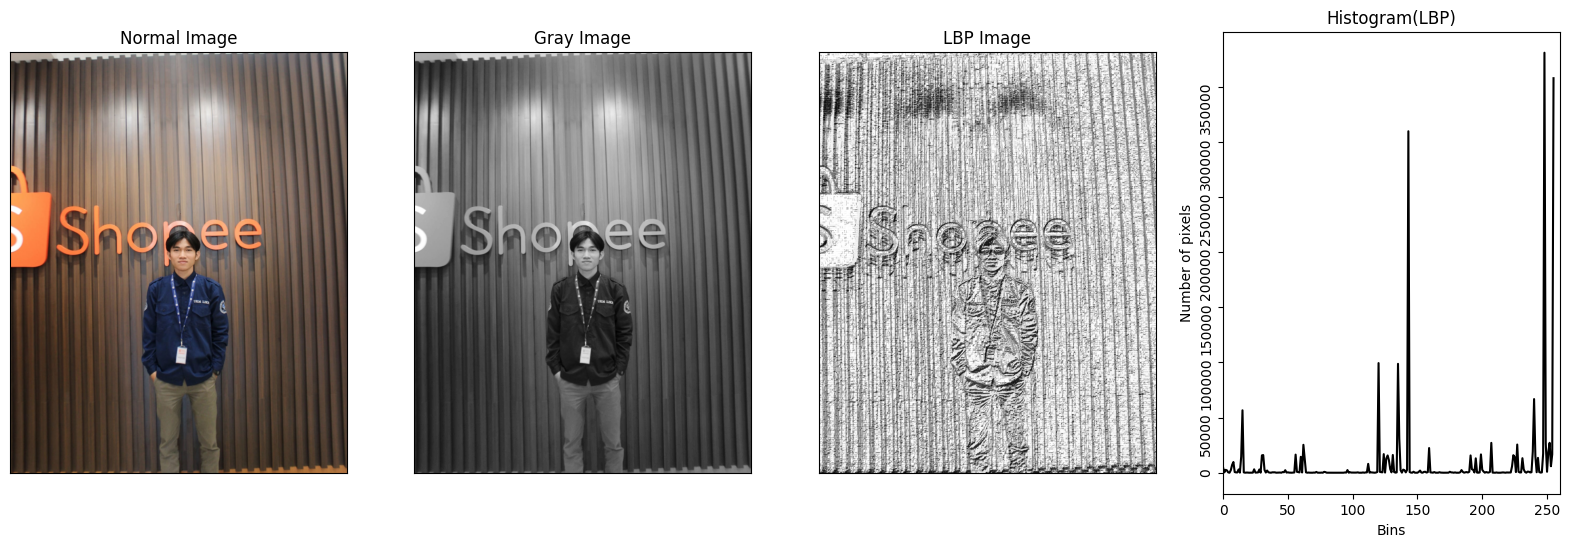

In [6]:
def brighter(nilai, img):
    height, width, _ = img.shape
    img_b = np.zeros((height, width, 3), np.uint8)
    for y in range(0, height):
        for x in range(0, width):
            red = img[y][x][2] + nilai
            green = img[y][x][1] + nilai
            blue = img[y][x][0] + nilai

            if red > 255:
                red = 255
            if red < 0:
                red = 0
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0

            img_b[y][x] = (blue, green, red)

    return img_b


image_file = 'shopee1.jpg'
image_file2 = 'shopee2.jpg'

img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(brighter(50, img_bgr), cv2.COLOR_BGR2GRAY)

img_bgr2 = cv2.imread(image_file2)
height2, width2, channel2 = img_bgr2.shape
img_gray3 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

def lbp(img_gray, height, width, img_bgr):
    img_lbp = np.zeros((height, width, 3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])

    output_list = []
    output_list.append({
        "img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Normal Image",
        "type": "normal"
    })
    output_list.append({
        "img": img_gray,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Gray Image",
        "type": "gray"
    })
    output_list.append({
        "img": img_lbp,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "LBP Image",
        "type": "gray"
    })
    output_list.append({
        "img": hist_lbp,
        "xlabel": "Bins",
        "ylabel": "Number of pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram(LBP)",
        "type": "histogram"
    })

    show_output(output_list)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

print("LBP Program selesai")

lbp(img_gray, height, width, img_bgr)
lbp(img_gray2, height, width, img_bgr)
lbp(img_gray3, height2, width2, img_bgr2)

